In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits import mplot3d

In [2]:
def R_eta(phi, theta, psi):
    R = np.array([[math.cos(psi)*math.cos(theta), math.cos(psi)*math.sin(theta)*math.sin(phi) - math.cos(phi)*math.sin(psi), math.cos(phi)*math.cos(psi)*math.sin(theta) + math.sin(phi)*math.sin(psi)],
        [math.cos(theta)*math.sin(psi), math.sin(psi)*math.sin(theta)*math.sin(phi) + math.cos(phi)*math.cos(psi), math.cos(phi)*math.sin(theta)*math.sin(psi) - math.cos(psi)*math.sin(phi)],
        [- math.sin(theta), math.cos(theta)*math.sin(phi), math.cos(theta)*math.cos(phi)]])
    return R

# attitude of the quadrotor
def eta(phi, theta, psi):
    e = np.array([phi, theta, psi])
    return e.transpose()

def position(x,y,z):
    p = np.array([x,y,z])
    return p.transpose()

# linear translational velocity
def velocity(v_x, v_y, v_z):
    v = np.array([v_x, v_y, v_z])
    return v.transpose()

#  angular velocity
def zeta(p, q, r):
    z = np.array([p,q,r])
    return z.transpose()

# matrix relating the rotation angles η to the angular velocity ξ
def R_T(phi, theta):
    t  = np.array([[1, 0, -math.sin(theta)],[0, math.cos(phi), math.cos(theta)*math.sin(phi)],[0, -math.sin(phi), math.cos(theta)*math.cos(phi)]])
    return t

In [3]:
np.linalg.inv(R_eta(0, 0, 0))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
R_eta(0, 0, 0).transpose()

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [5]:
np.linalg.det(R_eta(0, 0, 0))

1.0

In [6]:
def eta_dot(phi, theta, p, q, r ):
    print(np.linalg.inv(R_T(phi, theta)), zeta(p, q, r))
    return np.dot(np.linalg.inv(R_T(phi, theta)),zeta(p, q, r))

In [7]:
eta_dot(0,0,1,1,1)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] [1 1 1]


array([1., 1., 1.])

In [8]:
def f_2(v_x, v_y, v_z):
    return - np.dot(d_p,velocity(v_x, v_y, v_z))/m

def S_zeta(p,q,r):
    return np.array([[0,-r,q],[r,0,-p],[-q,p,0]])


In [9]:
def p_des(t):
    p_d = np.array([(1+t)*math.cos(0.5*t),(4+0.1*t)*math.sin(0.5*t),1+0.5*t])
    return p_d.transpose()
# Initial Conditions
p_in = np.array([0,0,0])
v_in = np.array([0,0,0])

In [10]:
n=10
e_0 = np.zeros((6,n))
print(e_0)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
class des:
  ####  Desired Trajectory
    def __init__(self):
        self.trajectory()

    def pos_d(self,t):

        p_d = np.array([(1+t)*math.cos(0.5*t),(4+0.1*t)*math.sin(0.5*t),1+0.5*t])
        return p_d
    
    def vel_d(self,t):
        
        p_dot_d = np.array([math.cos(0.5*t) - 0.5*(1+t)*math.sin(0.5*t), 0.1*math.sin(0.5*t) + 0.5*(4+0.1*t)*math.cos(0.5*t), 0.5])
        return p_dot_d

    def acc_d(self,t):
        
        p_ddot_d = np.array([-0.5*math.sin(0.5*t) - 0.5*math.sin(0.5*t) - 0.25*(1+t)*math.cos(0.5*t), 0.05*math.cos(0.5*t) + 0.05*math.cos(0.5*t) - 0.25*(4+0.1*t)*math.sin(0.5*t),0])
        return p_ddot_d
    
    def trajectory(self):
        total_time = 20.0
        dt = 0.01
        self.dt = dt
        iter = int(total_time/dt)
        t_arr = np.linspace(0.0, total_time, iter)
        
        x_path = []
        y_path = []
        z_path = []

        x_dot_path = []
        y_dot_path = []
        z_dot_path = []

        x_ddot_path = []
        y_ddot_path = []
        z_ddot_path = []

        for i in range(iter):
            p = self.pos_d(t_arr[i])
            p_dot = self.vel_d(t_arr[i])
            p_ddot = self.acc_d(t_arr[i])
            
            x_path.append(p[0])
            y_path.append(p[1])
            z_path.append(p[2])

            x_dot_path.append(p_dot[0])
            y_dot_path.append(p_dot[1])
            z_dot_path.append(p_dot[2])

            x_ddot_path.append(p_ddot[0])
            y_ddot_path.append(p_ddot[1])
            z_ddot_path.append(p_ddot[2])
            
        
        self.x_path = x_path
        self.y_path = y_path
        self.z_path = z_path

        self.x_dot_path = x_dot_path
        self.y_dot_path = y_dot_path
        self.z_dot_path = z_dot_path

        self.x_ddot_path = x_ddot_path
        self.y_ddot_path = y_ddot_path
        self.z_ddot_path = z_ddot_path


In [13]:
class smc:
    
    def __init__(self,m,alpha_1,alpha_2,beta,d_p,dt):
        # Gravity Vector
        self.g = np.array([0 , 0 , -9.8]).transpose()
        self.m = m
        self.alpha_1 = alpha_1
        self.alpha_2 = alpha_2
        self.beta=beta
        self.d_p = d_p
        self.dt=dt
    
    def controller(self, p, p_dot, p_d, p_dot_d, p_ddot_d, psi_d):
        
        self.p = p
        self.p_dot = p_dot
        
        #Desired
        self.p_d = p_d
        self.p_dot_d = p_dot_d
        self.p_ddot_d = p_ddot_d
        self.psi_d = psi_d
        
        total_time = 20.0
        dt = 0.01
        iter = int(total_time/dt)
        p_e = np.zeros((iter,3))
        v_e = np.zeros((iter,3))
        s_0 = np.zeros((iter,3))
        
        p_e[:,0] = self.p_d - self.p
        v_e[:,0] = self.p_dot_d - self.p_dot
        s_0[:,0] = 0
        
        t_arr = np.linspace(0.0, total_time, iter)

        # Numerical Integration
        for i in range(iter):
            p_e[:,i+1] = p_e[:,i] + v_e[:,i]*self.dt
            v_e[:,i+1] = v_e[:,i] + self.dt*(self.p_ddot_d - self.p_dot)
            s_0[:,i+1] = s_0[:,i] + (self.alpha_1*p_e[:,i] + self.alpha_2*v_e[:,i])*self.dt + (v_e[:,i+1] - v_e[:i])
            
        E = self.alpha_1*p_e[:,iter] + self.alpha_2*v_e[:,iter] + self.p_ddot_d + self.g[2] + np.dot(self.d_p,self.p_dot)/self.m
        E_hat = E + beta[0]*np.sign(s_0[:,iter])
            
        phi_d = np.arcsin((E_hat[0]*np.sin(self.psi_d) - E_hat[1]*np.cos(self.psi_d))/np.linalg.norm(E_hat, 2))
        theta_d = np.arctan((E_hat[0]*np.cos(self.psi_d) + E_hat[1]*np.sin(self.psi_d))/E_hat[2])
        u_t = np.dot(R_eta(phi_d,theta_d,self.psi_d).transpose(), E_hat)
            
        self.update()
            
        #def update(self):
            
        
        
        
        

In [14]:
if __name__ == "__main__":
    
    # Mass of the quadrotor
    m = 0.47
    alpha_1 = 5
    alpha_2 = alpha_1
    beta = np.array([0.01,1.5,2])
    # coefficients of the rotary inertia
    J_p = np.diag(np.array([4.9e-3 ,4.9e-3 ,8.8e-3]))
    # moments in the body-fixed frame
    Tau_n = np.array([1 ,1 , 1]).transpose()
    # Air Drag
    d_p = np.diag(np.array([4e-7,4e-7,4e-7]))
    # aerodynamic drag coefficients
    d_eta = np.diag(np.array([6e-5,6e-5,6e-5]))
    
    Des = des()
    x_des = Des.x_path
    y_des = Des.y_path
    z_des = Des.z_path
    
    x_dot_des = Des.x_dot_path
    y_dot_des = Des.y_dot_path
    z_dot_des = Des.z_dot_path
    
    x_ddot_des = Des.x_ddot_path
    y_ddot_des = Des.y_ddot_path
    z_ddot_des = Des.z_ddot_path
    
    dt = Des.dt
    

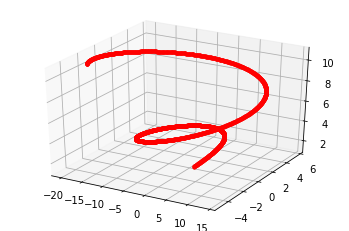

In [15]:
fig = plt.figure();
ax = plt.axes(projection = '3d');
ax.plot3D(x_des, y_des, z_des, linestyle = '-.', marker = '.', color = 'red');